In [27]:
import numpy as np
import os
import tensorflow as tf 
# import keras.backend as K

In [28]:
x_train = np.load("C:\\Users\\gazur\\Desktop\\Computer Vision\\Imbalance medical image synthesis with label noise\\DATASET\\Finale_Data/x_upsampled.npy") 
y_train = np.load("C:\\Users\\gazur\\Desktop\\Computer Vision\\Imbalance medical image synthesis with label noise\\DATASET/Finale_Data/y_upsampled.npy")
x_test = np.load("C:\\Users\\gazur\\Desktop\\Computer Vision\\Imbalance medical image synthesis with label noise\\DATASET\\Finale_Data/x_test.npy")
y_test = np.load("C:\\Users\\gazur\\Desktop\\Computer Vision\\Imbalance medical image synthesis with label noise\\DATASET\\Finale_Data/y_test.npy")

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1627, 256, 256, 3), (1627, 2), (379, 256, 256, 3), (379, 2))

In [21]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',  factor=.01,   patience=3,  min_lr=1e-5)

In [22]:
from keras.regularizers import l2
# 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6
# kernel_regularizer=l2(param)

In [23]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(256,256,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 96)        384       
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 256)      

In [24]:
import time

In [25]:
AlexNet.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adagrad(learning_rate=0.001),metrics=['accuracy'])

In [26]:
start_time = time.time()
train=AlexNet.fit(x_train, y_train,
            batch_size=16,
            epochs=2,
            validation_data=(x_test, y_test),
            callbacks=[lrr], # early_stopping, checkpointer, reduce_lr
            shuffle=False)
end_time = time.time()
print("--- Time taken to train : %s minuts ---" % ((end_time - start_time)//60))

Train on 1627 samples, validate on 379 samples
Epoch 1/2


ResourceExhaustedError: OOM when allocating tensor with shape[16384,4096] and type float on /job:localhost/replica:0/task:0/device:DML:0 by allocator DmlAllocator
	 [[{{node training_2/Adagrad/mul_20}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


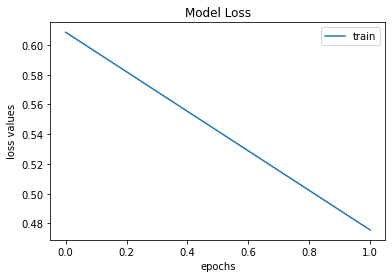

In [12]:
# plot loss during training
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='train')
# plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

### Classification metrix

In [13]:
# Untunned Scores of the Model
import sklearn.metrics as metrics
y_pred=AlexNet.predict_classes(x_test)

In [14]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
# %%Accuracy

print("Accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1),y_pred))

# %%f1 score

print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))

Accuracy: 0.19788918205804748
f1_weighted: 0.06538188834516986


In [18]:
train.history['loss']

[0.4276738814510446,
 0.3648434333187272,
 0.3158891720682401,
 0.2755908997112355,
 0.24041474430599166,
 0.21885848125945445,
 0.20200350377811707,
 0.19080517061407315,
 0.18253141326558464,
 0.17504174440421424]

In [19]:
test.history['val_loss']

[3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121,
 3.035044870150121]

In [ ]:
#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')

In [27]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(y_test, axis=1), y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       304
           1       0.00      0.00      0.00        75

    accuracy                           0.80       379
   macro avg       0.40      0.50      0.45       379
weighted avg       0.64      0.80      0.71       379



C:\Anaconda\envs\GPU_Keras\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\GPU_Keras\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\GPU_Keras\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


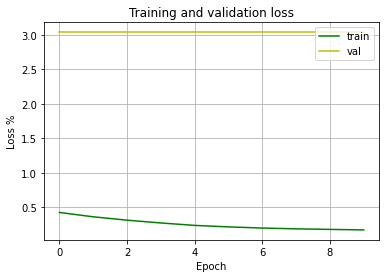

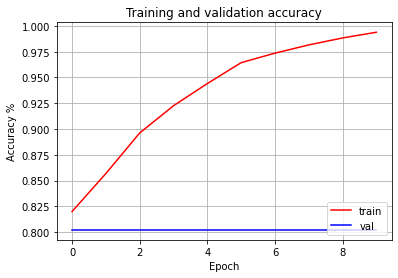

Done training and logging!


In [28]:
# Plot and save accuravy loss graphs together
def plot_loss_accu_all(history):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(loss))
    
    plt.plot(epochs, acc, 'r')
    plt.plot(epochs, val_acc, 'b')
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Accuracy/Loss')
    
    #plt.ylabel('Rate')
    #plt.xlabel('Epoch')
    
    plt.legend(['trainacc', 'valacc', 'trainloss', 'valloss'], loc='lower right', fontsize=10)
    plt.grid(True)
    plt.savefig('{}/{}_acc_loss_graph.jpg'.format(output_path, EXP_NAME), dpi=100)
    plt.show()

# Plot and save accuravy loss graphs individually
def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Training and validation loss')
    plt.ylabel('Loss %')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid(True)
    #plt.savefig('{}/{}_loss.jpg'.format(output_path, EXP_NAME), dpi=100)
    #plt.savefig('{}/{}_loss.pdf'.format(output_path, EXP_NAME), dpi=300)
    plt.show()
    
    loss = history.history['accuracy']
    val_loss = history.history['val_accuracy']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy %')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid(True)
    #plt.savefig('{}/{}_acc.jpg'.format(output_path, EXP_NAME), dpi=100)
    #plt.savefig('{}/{}_acc.pdf'.format(output_path, EXP_NAME), dpi=300)
    plt.show()

plot_loss_accu(AlexNet.history)
print("Done training and logging!")

In [7]:
# Recall or sensiivity
AlexNet.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Recall()])

In [8]:
start_time = time.time()
AlexNet.fit(x_train, y_train, batch_size=16, epochs=1, callbacks = [lrr], verbose=1)
score = AlexNet.evaluate(x_test, y_test, batch_size=32)
end_time = time.time()
print("--- Time taken to train : %s minuts ---" % ((end_time - start_time)//60))


Epoch 1/1
1627/1627 [==============================] - 114s 70ms/step - loss: 0.2368 - recall: 0.6001


C:\Anaconda\envs\GPU_Keras\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,recall,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


379/379 [==============================] - 8s 21ms/step
--- Time taken to train : 2.0 minuts ---


In [ ]:
AlexNet.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC()])

In [ ]:
AlexNet.fit(x_train, y_train, batch_size=16, epochs=1, callbacks = [lrr], verbose=1)
score = AlexNet.evaluate(x_test, y_test, batch_size=32)